# Example 4: Use of rectengulararay

A 2x3 array of via's is produced using `rectangulararray`. This example does not create a complete FastHenry file.

In [2]:
using FastHenryHelper
using Plots;gr()

Plots.GRBackend()

Create a single via at the origin.

Parameter `height` is the height of the via and `h` is the thickness of the copper plating (height of the vias segments).  Parameters `topequiv` and `botequiv` determine if the ring of nodes and the center node are connected with an equiv command.  The default setting `true` is used so the center node (`:top` or `:bot`) can connect to a segment.  To connect to a plane `topequiv` and / or  `botequiv` should be set to `false` so `:alltop` and / or `:allbot` can connect to the plane.  

In [3]:
via = viagroup(radius=5, height=7, h=3, n=8, topequiv = false, botequiv = false);

Create a `Group` of six vias

As its second parameter, `transform` can accept an iterable returning 4x4 matrices and returns a `Group` containing deepcopies of the `Element` modified by each 4x4 transformation matrix.  If the `Element` is a `Group`, the returned `Group`s terminal dictionary will have the same keys as `Group` passed as a parameter.  The values will be an array of all the `Node`s with corresponding keys.  In other words, the terminals of the returned `Group` will connect all the Groups in parallel.  This behavior is intended to make it easy to connect planes with arrays of vias.

In [4]:
six_vias = transform(via,  rectangulararray([20,40,60],[10,30]));

Create objects needed to connect to plane.

`planeconnect` returns a tuple of two objects needed to connect to a plane.  In this case, `plane_nodes` is a `deepcopy` of nodes `six_vias[:alltop]` and `equiv_group` connects the corresponding nodes in `plane_nodes` and `six_vias[:alltop]`.

In [5]:
(plane_nodes, equiv_group) = planeconnect(six_vias[:alltop]);

Create the plane.

In [6]:
plane = UniformPlane(
        x1=80.0, y1= 80.0, z1=0.0,
        x2= 0.0, y2= 80.0, z2=0.0,
        x3= 0.0, y3= 0.0, z3=0.0,
        thick = 1,
        seg1=100, seg2=100,
        nodes = plane_nodes);

Create a `Group` with all elements.

In [7]:
example4 = Group([six_vias;plane;equiv_group]);

Create a plot using `Plots` with a `plotly` backend.

┌ Warning: You created n=354 groups... Is that intended?
└ @ Plots C:\Users\Chris\.julia\packages\Plots\EJpx2\src\args.jl:1073


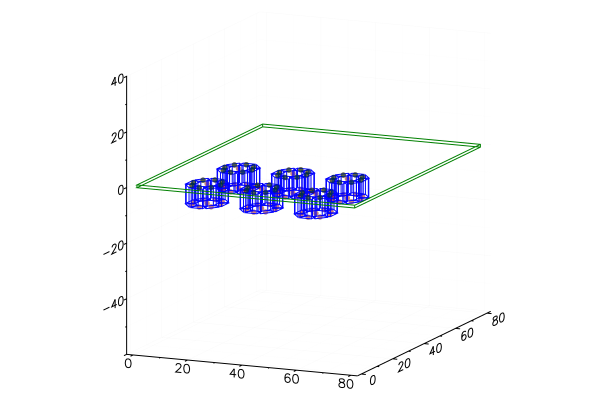

In [8]:
plot(example4)